In [1]:
import os
import sys
# Add src/ to sys.path (relative to current notebook)
sys.path.append(os.path.abspath("../../src"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

from utils.DataAnalysis import TableAnalysis, MyCustomException
from utils.VariableAnalysis import UnivariateAnalysis,BivariateAnalysis
from utils.pdf_file_save import PDFReportWriter

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Helper Functions

In [2]:
os.getcwd()

'd:\\CapStone Project\\House_Pricing\\notebook\\data_wrangling'

In [3]:
file_path = pathlib.Path('D:\Capstone Project\dataset\House_Price_dataset')

In [4]:
df = pd.read_csv(f"{file_path}/5.gurgaon_properties_cleaned_v2.csv")
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,apna enclave,sector 3,8.00,6153.0,13002.0,Super Built up area 1300(120.77 sq.m.)Built Up...,3,3,1,0.0,NaN,Old Property,1300.0,1000.0,NaN,0,0,0,0,0,1,0
1,flat,la vida by tata housing,sector 113,2.00,11346.0,1763.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3,3,3,3.0,North,New Property,2690.0,2599.0,2450.0,1,1,0,0,0,1,174
2,house,independent,sector 56,3.25,21495.0,1512.0,Plot area 168(140.47 sq.m.),5,6,3+,4.0,East,Relatively New,NaN,1512.0,NaN,0,0,0,1,1,0,27
3,flat,g l s arawali homes,sohna road,2.00,4513.0,4432.0,Super Built up area 576(53.51 sq.m.),2,2,2,1.0,NaN,Moderately Old,576.0,NaN,NaN,0,0,0,0,0,1,0
4,flat,tarc maceo,sector 91,9.00,5413.0,16627.0,Super Built up area 1404(130.44 sq.m.),2,2,3+,8.0,East,Moderately Old,1404.0,NaN,NaN,0,0,0,0,0,1,85


In [5]:
df.shape

(3803, 23)

In [6]:
## Parent Class Test
da_analysis = TableAnalysis(df)
print(da_analysis)

Rows: 3803
Columns: 23
Duplicates: 126
For Duplicate Records: ShowDuplicates()


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
## Parent Class Test
da_analysis = TableAnalysis(df)
print(da_analysis)

Rows: 3677
Columns: 23


In [9]:
da_analysis.CategoricalFeatureSummary()

,field,non_null_count,null_count,null%,dtype,unique_count,top_value,top_count,top_pct,top_3,top_3_pct,rare(<1%)_count,singleton_count,entropy,dominance_ratio,is_binary,high_cardinality
0,property_type,3677,0,0.0000,object,2,flat,2818,76.64,"[flat, house]","[76.64, 23.36]",0,0,0.5436,0.7664,True,False
1,society,3676,1,0.0272,object,677,independent,486,13.22,"[independent, tulip violet, ss the leaf]","[13.22, 2.04, 1.99]",672,308,5.4378,0.1322,False,True
2,sector,3677,0,0.0000,object,115,sohna road,154,4.19,"[sohna road, sector 85, sector 102]","[4.19, 2.91, 2.91]",74,1,4.3891,0.0419,False,True
3,areaWithType,3677,0,0.0000,object,2355,Plot area 360(301.01 sq.m.),37,1.01,"[Plot area 360(301.01 sq.m.), Plot area 300(25...","[1.01, 0.71, 0.52]",2354,1850,7.4539,0.0101,False,True
4,balcony,3677,0,0.0000,object,5,3+,1171,31.85,"[3+, 3, 2]","[31.85, 29.21, 24.07]",0,0,1.4448,0.3185,False,False
5,facing,2633,1044,28.3927,object,9,NaN,1044,28.39,"[nan, East, North-East]","[28.39, 16.97, 16.94]",0,0,1.9832,0.2839,False,False
6,agePossession,3677,0,0.0000,object,6,Relatively New,1646,44.76,"[Relatively New, New Property, Moderately Old]","[44.76, 16.13, 15.28]",0,0,1.5442,0.4476,False,False


In [10]:
da_analysis.NumericalFeatureSummary()

,field,non_null_count,null_count,null%,dtype,min,max,mean,median,std,var (M),1 %,5 %,25 %,50 %,75 %,95 %,99 %,IQR,lower_bound,upper_bound,outliers_count,outlier_percentage,skewness,kurtosis,distribution_summary
0,price,3660,17,0.4623,float64,0.07,31.5,3.51,2.0,3.33,0.00,0.45,1.00,1.00,2.0,5.0,9.0,15.26,4.00,-5.000,11.000,88,2.40,1.99,6.44,"Highly Skewed (Positive: tail on the right), L..."
1,price_per_sqft,3660,17,0.4623,float64,4.00,600000.0,13892.42,9020.0,23210.00,538.70,3299.16,4715.95,6817.25,9020.0,13880.5,33333.0,85052.47,7063.25,-3777.625,24475.375,354,9.67,11.44,186.93,"Highly Skewed (Positive: tail on the right), V..."
2,area,3660,17,0.4623,float64,50.00,7500000.0,11433.93,1800.0,207070.80,42878.31,245.90,694.90,1219.00,1800.0,4432.0,13661.1,20250.82,3213.00,-3600.500,9251.500,451,12.32,30.53,954.94,"Highly Skewed (Positive: tail on the right), V..."
3,bedRoom,3677,0,0.0000,int64,1.00,21.0,3.36,3.0,1.90,0.00,1.00,2.00,2.00,3.0,4.0,6.0,12.00,2.00,-1.000,7.000,143,3.89,3.49,18.22,"Highly Skewed (Positive: tail on the right), V..."
4,bathroom,3677,0,0.0000,int64,1.00,21.0,3.42,3.0,1.95,0.00,1.00,2.00,2.00,3.0,4.0,6.0,12.00,2.00,-1.000,7.000,126,3.43,3.25,17.54,"Highly Skewed (Positive: tail on the right), V..."
5,floorNum,3658,19,0.5167,float64,0.00,51.0,6.80,5.0,6.01,0.00,0.00,1.00,2.00,5.0,10.0,18.0,27.00,8.00,-10.000,22.000,81,2.21,1.69,4.52,"Highly Skewed (Positive: tail on the right), L..."
6,super_built_up_area,1875,1802,49.0073,float64,89.00,10000.0,1924.79,1828.0,763.79,0.58,520.36,767.00,1479.50,1828.0,2215.0,3185.0,4636.68,735.50,376.250,3318.250,89,4.75,1.84,10.38,"Highly Skewed (Positive: tail on the right), V..."
7,built_up_area,1690,1987,54.0386,float64,2.00,737147.0,2379.59,1650.0,17942.88,321.95,61.89,240.45,1100.00,1650.0,2400.0,4691.0,7455.50,1300.00,-850.000,4350.000,127,7.51,40.71,1667.87,"Highly Skewed (Positive: tail on the right), V..."
8,carpet_area,1872,1805,49.0889,float64,15.00,607936.0,2529.18,1300.0,22799.84,519.83,92.31,350.00,843.00,1300.0,1790.0,2950.0,6859.50,947.00,-577.500,3210.500,78,4.17,24.33,604.54,"Highly Skewed (Positive: tail on the right), V..."
9,study room,3677,0,0.0000,int64,0.00,1.0,0.19,0.0,0.39,0.00,0.00,0.00,0.00,0.0,0.0,1.0,1.00,0.00,0.000,0.000,705,19.17,1.57,0.46,"Highly Skewed (Positive: tail on the right), M..."


In [11]:
da_analysis.get_outliers_for_column(column='price').sort_values('price',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
352,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
1329,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,0,42
1170,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,0,138
1358,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,0,72
1317,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,house,unitech espace,sector 50,11.50,35494.0,3240.0,Built Up area: 3240 (301.01 sq.m.),5,6,0,1.0,North-West,Undefined,NaN,3240.0,NaN,0,0,0,0,0,1,0
1843,house,international city by sobha phase 2,sector 109,11.30,25111.0,4500.0,Plot area 500(418.06 sq.m.)Built Up area: 480 ...,7,5,3+,4.0,East,Relatively New,NaN,480.0,460.0,1,1,0,1,1,1,49
3749,house,unitech espace,sector 50,11.29,34846.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3+,2.0,NaN,Moderately Old,NaN,3240.0,NaN,1,0,0,1,0,1,21
725,house,international city by sobha phase 2,sector 109,11.25,25000.0,4500.0,Plot area 500(418.06 sq.m.),7,5,3+,4.0,North-East,Relatively New,NaN,4500.0,NaN,1,1,0,1,0,1,42


# --------------- 1. Univariate Analysis Categorical Column ------------------

In [12]:
## Class Instantiation 
df_uni = UnivariateAnalysis(df) 
column_type = df_uni.ColumnVariable()

dict_keys(['categorical_columns', 'numerical_columns'])


In [13]:
categorical_columns = column_type.get('categorical_columns')
numerical_columns = column_type.get('numerical_columns')

#### Property Type Column Deep Analysis

In [14]:
categorical_columns

['property_type',
 'society',
 'sector',
 'areaWithType',
 'balcony',
 'facing',
 'agePossession']

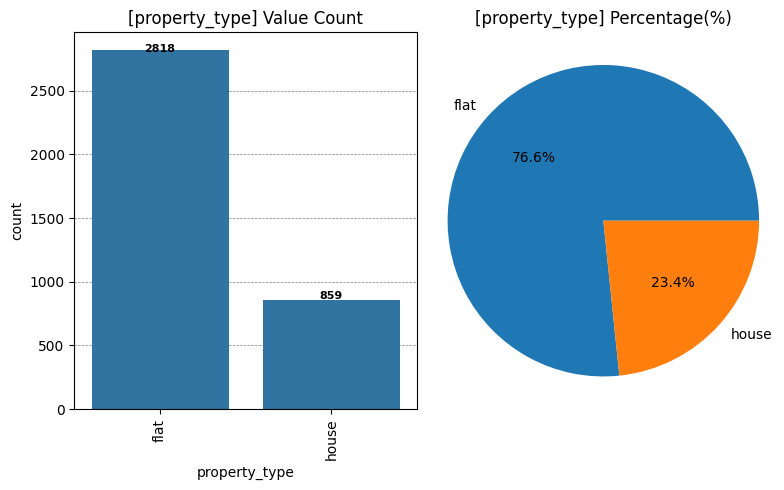

In [15]:
# ### Categorical Column Analysis
# for each in categorical_columns:
#     df_uni.CategoricalFeaturesAnalysis(each)

property_type_observation = df_uni.CategoricalFeaturesAnalysis('property_type')


In [16]:
property_type_observation

,field,property_type
0,non_null_count,3677
1,null_count,0
2,null%,0.0
3,dtype,object
4,unique_count,2
5,top_value,flat
6,top_count,2818
7,top_pct,76.64
8,top_3,"[flat, house]"
9,top_3_pct,"[76.64, 23.36]"


#### Society Column Deep Analysis

[society] Has Higher Unique Values, Picked Top Higher Frequency Value


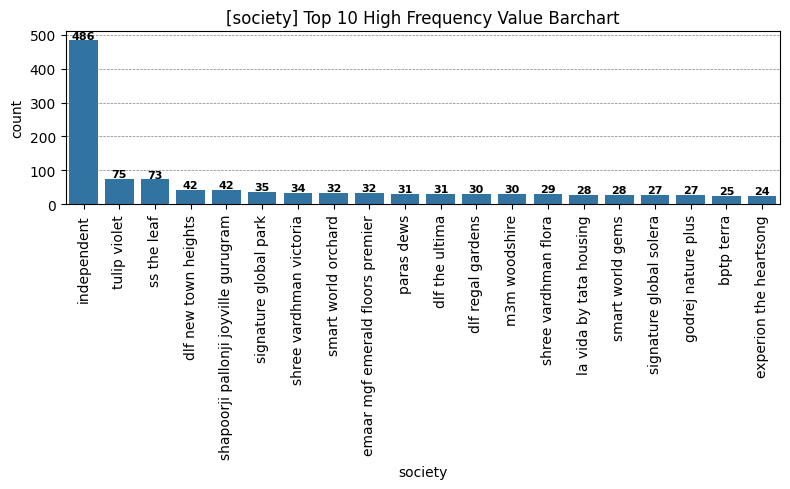

In [17]:
# #### Categorical Column Analysis
# for each in ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']:
#     df_uni.CategoricalFeaturesAnalysis(each)


df_uni = UnivariateAnalysis(df) 
society_observation = df_uni.CategoricalFeaturesAnalysis('society')

In [18]:
society_observation

,field,society
0,non_null_count,3676
1,null_count,1
2,null%,0.0272
3,dtype,object
4,unique_count,677
5,top_value,independent
6,top_count,486
7,top_pct,13.22
8,top_3,"[independent, tulip violet, ss the leaf]"
9,top_3_pct,"[13.22, 2.04, 1.99]"


In [19]:
df['society'].isnull().sum()
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2040,flat,NaN,sector 78,6.0,3692.0,16251.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,NaN,NaN,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,1,0


#### Sector Column Deep Analysis

[sector] Has Higher Unique Values, Picked Top Higher Frequency Value


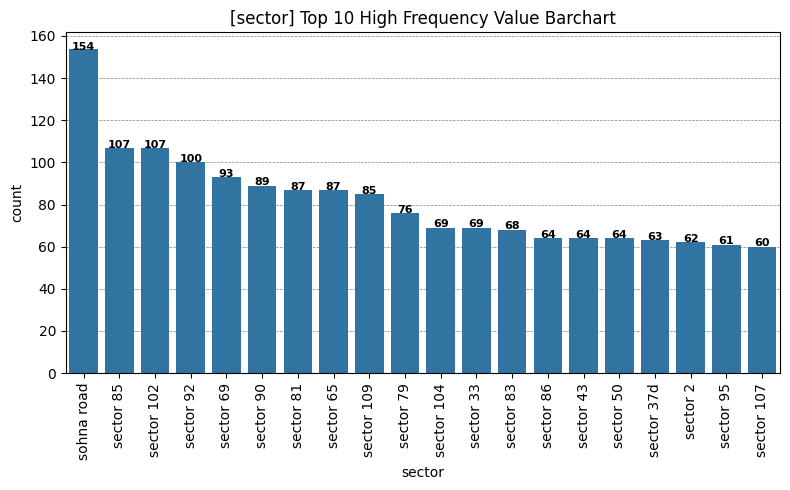

In [20]:
# #### Categorical Column Analysis
# for each in ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']:
#     df_uni.CategoricalFeaturesAnalysis(each)

df_uni = UnivariateAnalysis(df) 
sector_observation = df_uni.CategoricalFeaturesAnalysis('sector')

In [21]:
sector_observation

,field,sector
0,non_null_count,3677
1,null_count,0
2,null%,0.0
3,dtype,object
4,unique_count,115
5,top_value,sohna road
6,top_count,154
7,top_pct,4.19
8,top_3,"[sohna road, sector 85, sector 102]"
9,top_3_pct,"[4.19, 2.91, 2.91]"


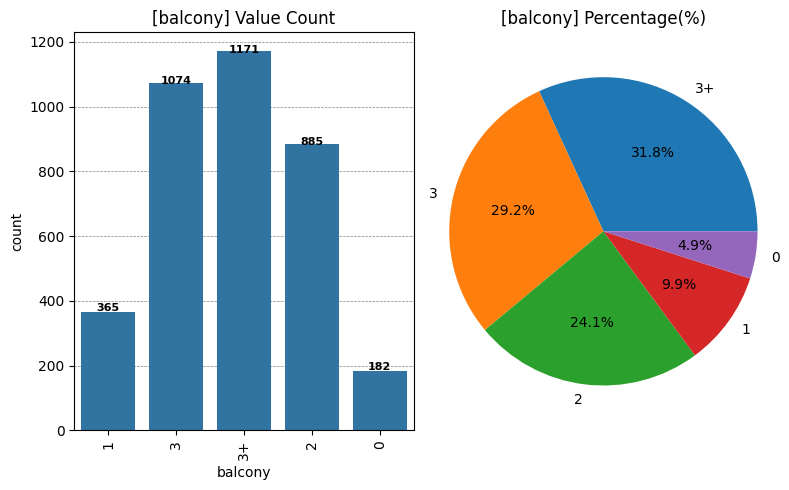

In [22]:
# #### Categorical Column Analysis
# for each in ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']:
#     df_uni.CategoricalFeaturesAnalysis(each)

df_uni = UnivariateAnalysis(df) 
balcony_observation = df_uni.CategoricalFeaturesAnalysis('balcony')

# ---------------2. Univariate Analysis Numerical Column -------------------

In [23]:
numerical_columns

['price',
 'price_per_sqft',
 'area',
 'bedRoom',
 'bathroom',
 'floorNum',
 'super_built_up_area',
 'built_up_area',
 'carpet_area',
 'study room',
 'servant room',
 'store room',
 'pooja room',
 'others',
 'furnishing_type',
 'luxury_score']

In [24]:
# for each in numerical_columns:
#     df_uni.NumericalFeatureAnalysis(each)

#### [Price] Column Deep Analysis 

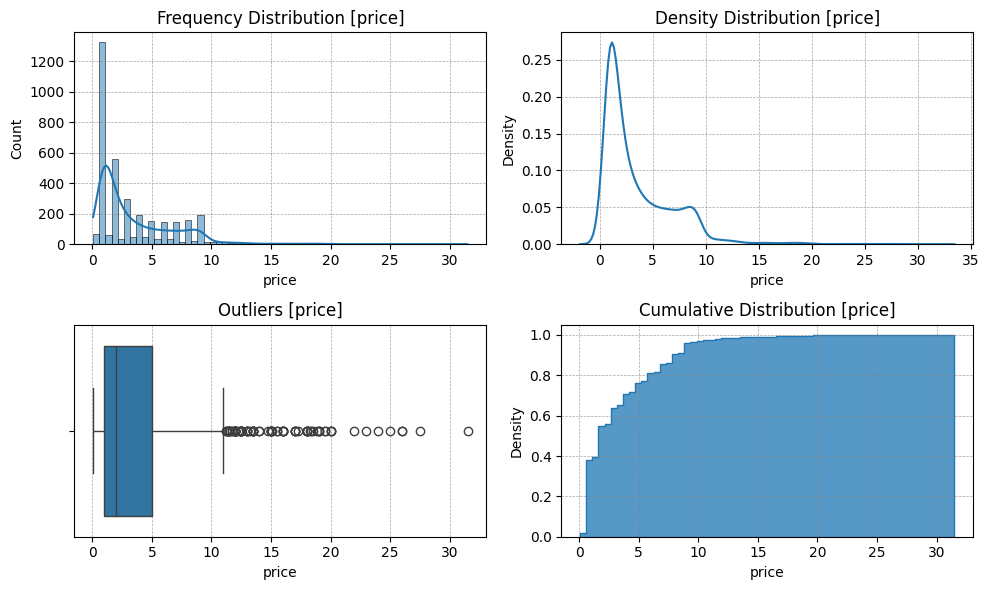

In [25]:
## Initial Data Visaulization Of Area

df_uni = UnivariateAnalysis(df) 
price_observation, price_outlier_df = df_uni.NumericalFeatureAnalysis('price')

In [26]:
price_observation

,field,price
0,non_null_count,3660
1,null_count,17
2,null%,0.4623
3,dtype,float64
4,min,0.07
5,max,31.5
6,mean,3.51
7,median,2.0
8,std,3.33
9,var (M),0.0


In [27]:
price_outlier_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
75,house,emaar mgf marbella,sector 66,18.00,40000.0,4500.0,Plot area 500(418.06 sq.m.),5,6,3+,3.0,North-East,Relatively New,NaN,4500.0,NaN,1,1,1,1,0,2,153
107,house,independent,sector 28,12.00,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,0,60
122,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,0,60
136,house,independent,sector 26,18.90,41833.0,4518.0,Plot area 502(419.74 sq.m.),6,8,2,3.0,North-East,Relatively New,NaN,4518.0,NaN,1,1,1,1,0,0,120
264,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3725,house,independent,sector 26,13.50,29880.0,4518.0,Plot area 502(419.74 sq.m.),5,5,3+,2.0,North-East,Relatively New,NaN,4518.0,NaN,1,1,0,1,1,2,49
3730,house,dlf city plots,sector 26,17.30,38734.0,4466.0,Plot area 502(419.74 sq.m.),6,7,3+,3.0,North,New Property,NaN,4518.0,NaN,1,1,1,1,0,0,124
3749,house,unitech espace,sector 50,11.29,34846.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3+,2.0,NaN,Moderately Old,NaN,3240.0,NaN,1,0,0,1,0,1,21
3793,house,international city by sobha phase 2,sector 109,12.50,26667.0,4687.0,Plot area 500(418.06 sq.m.),5,6,3,3.0,East,Relatively New,NaN,4500.0,NaN,1,1,1,1,0,1,63


In [28]:
# price_outlier_df.to_csv('price_outlier_df.csv', index=False)

### Since Our Output Data is highly Skewed, Log Transformation Experiment for Normal distribution 


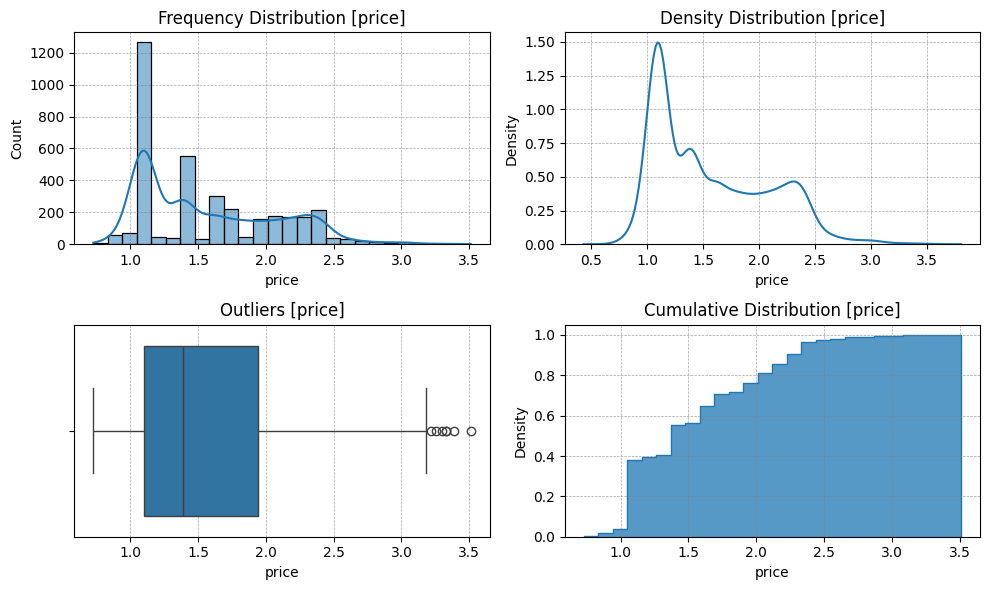

In [29]:
log_transfored_df = df.copy()
log_transfored_df['price'] = np.log1p(log_transfored_df['price'] + 1)
log_transfored_df =  UnivariateAnalysis(log_transfored_df)
log_transfored_Observation, log_transfored_outliers  = log_transfored_df.NumericalFeatureAnalysis('price')

In [30]:
# log_transfored_outliers

#### [price_per_sqft] Column Deep Analysis 

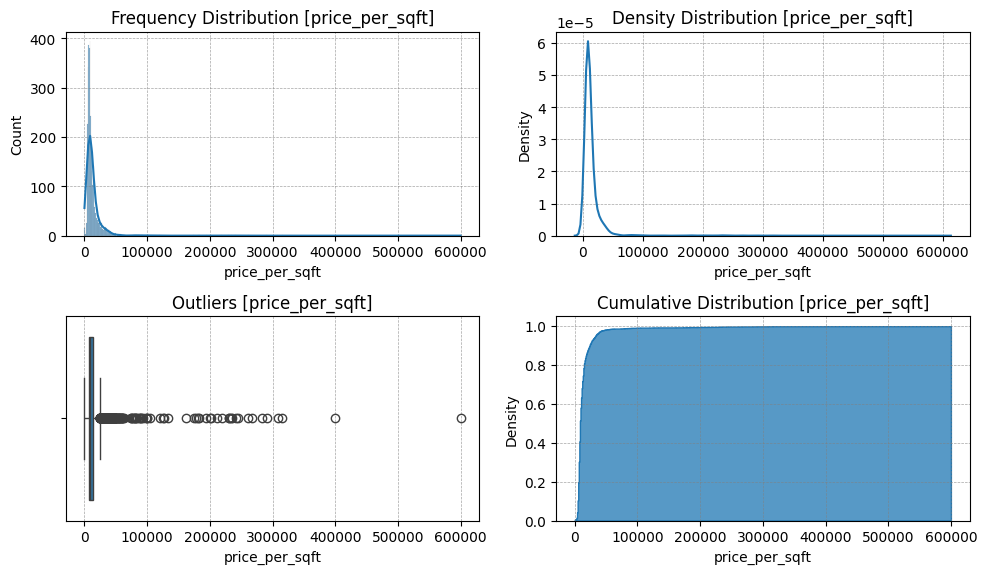

In [31]:
## Initial Data Visaulization

df_uni = UnivariateAnalysis(df) 
price_per_sqft_observation , price_per_sqft_outliers = df_uni.NumericalFeatureAnalysis('price_per_sqft')

In [32]:
price_per_sqft_observation

,field,price_per_sqft
0,non_null_count,3660
1,null_count,17
2,null%,0.4623
3,dtype,float64
4,min,4.0
5,max,600000.0
6,mean,13892.42
7,median,9020.0
8,std,23210.0
9,var (M),538.7


In [33]:
price_per_sqft_outliers['price_per_sqft'].describe()

count       354.000000
mean      52592.612994
std       61150.458507
min       24489.000000
25%       28208.250000
50%       33368.500000
75%       41982.250000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [34]:
price_per_sqft_outliers

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
19,house,independent,sector 43,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,5.0,West,New Property,NaN,549.0,NaN,0,1,0,0,0,1,20
27,house,sector 57 huda,sector 57,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,4.0,East,Relatively New,NaN,162.0,160.0,0,0,1,1,0,0,94
30,house,bptp astaire gardens,sector 70a,6.50,27871.0,2332.0,Plot area 299(250 sq.m.),4,4,3+,2.0,North-East,New Property,NaN,299.0,NaN,1,1,0,1,0,0,160
31,house,independent,sector 4,0.65,92857.0,70.0,Plot area 70(6.5 sq.m.),1,1,1,1.0,South-East,Moderately Old,NaN,70.0,NaN,0,0,0,0,1,1,21
48,house,unitech espace,sector 50,7.35,41762.0,1760.0,Plot area 240(200.67 sq.m.),4,4,3+,3.0,South,Moderately Old,NaN,240.0,NaN,0,1,0,1,0,0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3749,house,unitech espace,sector 50,11.29,34846.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3+,2.0,NaN,Moderately Old,NaN,3240.0,NaN,1,0,0,1,0,1,21
3773,house,independent,sector 4,0.61,100000.0,61.0,Plot area 61(5.67 sq.m.),2,2,2,2.0,South-East,Moderately Old,NaN,61.0,NaN,0,0,0,0,1,1,14
3791,house,independent,sector 55,5.00,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,0,44
3793,house,international city by sobha phase 2,sector 109,12.50,26667.0,4687.0,Plot area 500(418.06 sq.m.),5,6,3,3.0,East,Relatively New,NaN,4500.0,NaN,1,1,1,1,0,1,63


In [35]:
### In 'area' column data error, (area<1000) in square yards, (area>1000) in sq ft. 
## Logic Applied All the area < 1000 Multiplied By 9 (sq ft = sq yd × 9)
price_per_sqft_outliers['area'] = price_per_sqft_outliers['area'].apply(lambda x:x*9 if x<1000 else x)

## Recalulate price_per_sqft
price_per_sqft_outliers['price_per_sqft'] = round((price_per_sqft_outliers['price']*10000000)/price_per_sqft_outliers['area'])

price_per_sqft_outliers['price_per_sqft'].describe()


count      354.000000
mean     28964.429379
std      12761.384333
min       2723.000000
25%      25521.250000
50%      29669.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [36]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.416940
std       23209.998569
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [37]:
## Update in Original Data Frame 
df.update(price_per_sqft_outliers)

In [38]:
df['price_per_sqft'].describe()

count     3660.000000
mean     11607.068033
std       8094.109658
min          4.000000
25%       6732.500000
50%       8918.500000
75%      13413.750000
max      82540.000000
Name: price_per_sqft, dtype: float64

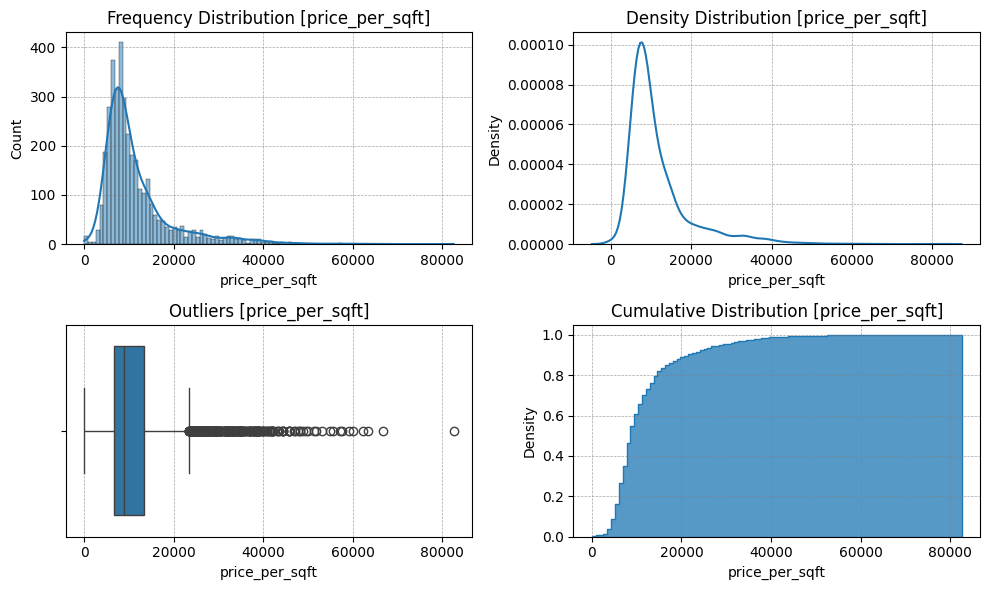

In [39]:
## After Recalculating area Price per square feet Logic

df_uni = UnivariateAnalysis(df)
a, b = df_uni.NumericalFeatureAnalysis(column='price_per_sqft')

In [40]:
df[df['price_per_sqft'] > 50000].shape

(13, 23)

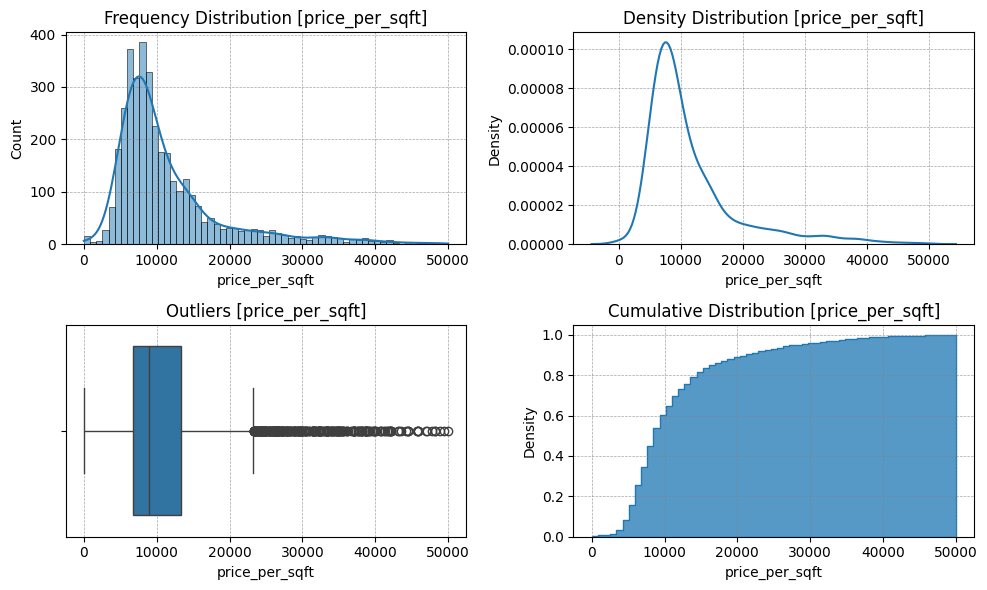

In [41]:
## Drop all the record where price_per_sqft> 50000
df= df[df['price_per_sqft'] <= 50000]

## After droping all the record where price_per_sqft> 50000
df_uni = UnivariateAnalysis(df)
a, b = df_uni.NumericalFeatureAnalysis(column='price_per_sqft')

#### [Area] Column Deep Analysis 

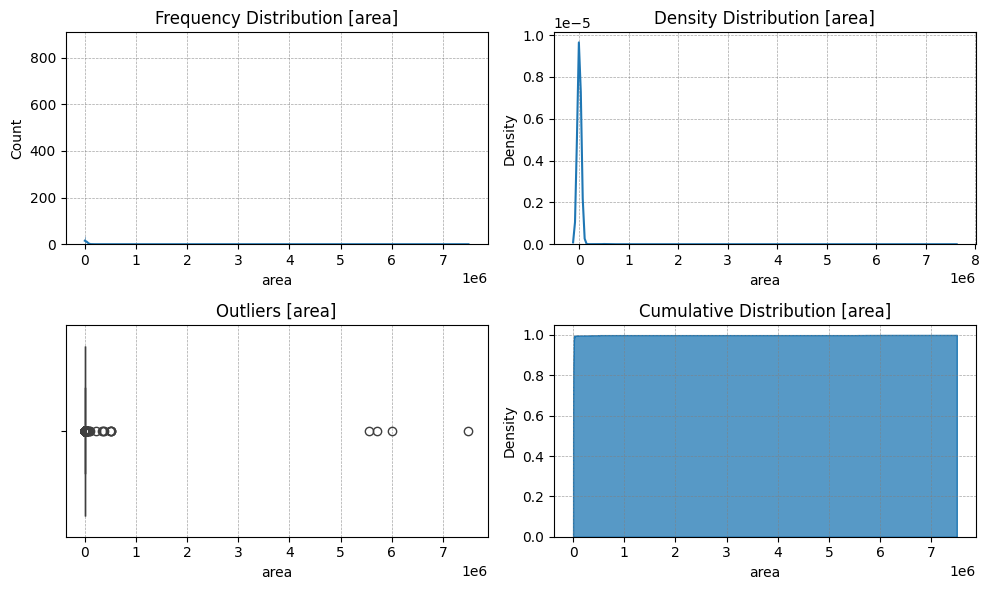

In [42]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('area')

In [43]:
a

,field,area
0,non_null_count,3647
1,null_count,0
2,null%,0.0
3,dtype,float64
4,min,145.0
5,max,7500000.0
6,mean,11527.69
7,median,1836.0
8,std,207436.31
9,var (M),43029.82


In [44]:
## Verifying the count of the Outliers in area column.

df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
186,flat,rof ananda,sector 95,3.0,60.0,500000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,1,37
364,flat,signature global solera 2,sector 107,5.0,9.0,5555556.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,1,44
677,flat,rof ananda,sector 95,3.0,58.0,517241.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,1,51
693,flat,rof ananda,sector 95,3.0,58.0,517241.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,1,15
696,flat,ramsons kshitij,sector 95,2.0,53.0,377358.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,1,33
1036,flat,signature the serenas,sohna road,2.0,57.0,350877.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,1,37
1397,flat,hcbs sports ville,sohna road,3.0,4.0,7500000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
1441,flat,pyramid elite,sector 86,4.0,79.0,506329.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,1,15
2463,house,independent,sector 50,5.0,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,0,0
2494,flat,ramsons kshitij,sector 95,3.0,5.0,6000000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,1,65


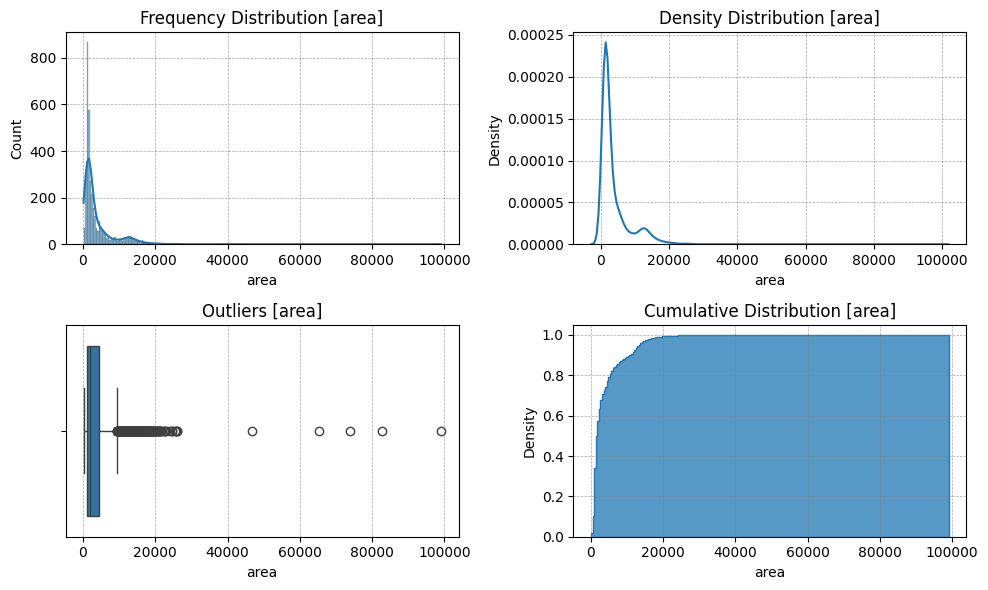

In [45]:
## Filtering All Records where Area < 100000
df = df[df['area'] < 100000]

df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('area')

In [46]:
## Fetching record where area > 10000 10 thousand
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
122,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,0,60
555,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
2905,flat,pivotal riddhi siddhi,sector 99,7.00,947.0,73918.0,Carpet area: 706,2,2,2,12.0,NaN,Relatively New,NaN,NaN,706.0,0,0,1,0,0,1,31
681,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.0,0,0,0,0,0,1,0
3058,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.0,0,1,1,0,0,0,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,flat,signature global park,sohna road,7.00,6938.0,10089.0,Built Up area: 1081 (100.43 sq.m.),2,2,0,1.0,NaN,Undefined,NaN,1081.0,NaN,0,0,0,0,0,1,58
1470,flat,signature global park,sohna road,7.00,6938.0,10089.0,Carpet area: 1081 (100.43 sq.m.),3,2,3+,4.0,East,New Property,NaN,NaN,1081.0,0,0,0,0,0,1,101
3408,flat,bestech park view ananda,sector 81,8.00,7951.0,10062.0,Super Built up area 1360(126.35 sq.m.)Built Up...,2,2,3,8.0,West,Relatively New,1360.0,1300.0,1094.0,0,0,0,0,0,1,95
2354,flat,smart world gems,sector 89,8.00,7963.0,10046.0,Carpet area: 1105 (102.66 sq.m.),2,2,3,2.0,NaN,New Property,NaN,NaN,1105.0,1,0,0,0,0,1,44


In [47]:
## Given Indexs has data Data Errors, decided to drop 

df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [48]:
## Exploring Data which area > 10000

df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
122,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,0,60
555,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
2905,flat,pivotal riddhi siddhi,sector 99,7.00,947.0,73918.0,Carpet area: 706,2,2,2,12.0,NaN,Relatively New,NaN,NaN,706.0,0,0,1,0,0,1,31
681,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.0,0,0,0,0,0,1,0
3058,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.0,0,1,1,0,0,0,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,flat,signature global park,sohna road,7.00,6938.0,10089.0,Built Up area: 1081 (100.43 sq.m.),2,2,0,1.0,NaN,Undefined,NaN,1081.0,NaN,0,0,0,0,0,1,58
1470,flat,signature global park,sohna road,7.00,6938.0,10089.0,Carpet area: 1081 (100.43 sq.m.),3,2,3+,4.0,East,New Property,NaN,NaN,1081.0,0,0,0,0,0,1,101
3408,flat,bestech park view ananda,sector 81,8.00,7951.0,10062.0,Super Built up area 1360(126.35 sq.m.)Built Up...,2,2,3,8.0,West,Relatively New,1360.0,1300.0,1094.0,0,0,0,0,0,1,95
2354,flat,smart world gems,sector 89,8.00,7963.0,10046.0,Carpet area: 1105 (102.66 sq.m.),2,2,3,2.0,NaN,New Property,NaN,NaN,1105.0,1,0,0,0,0,1,44


In [49]:
## Updating areas based on the error
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

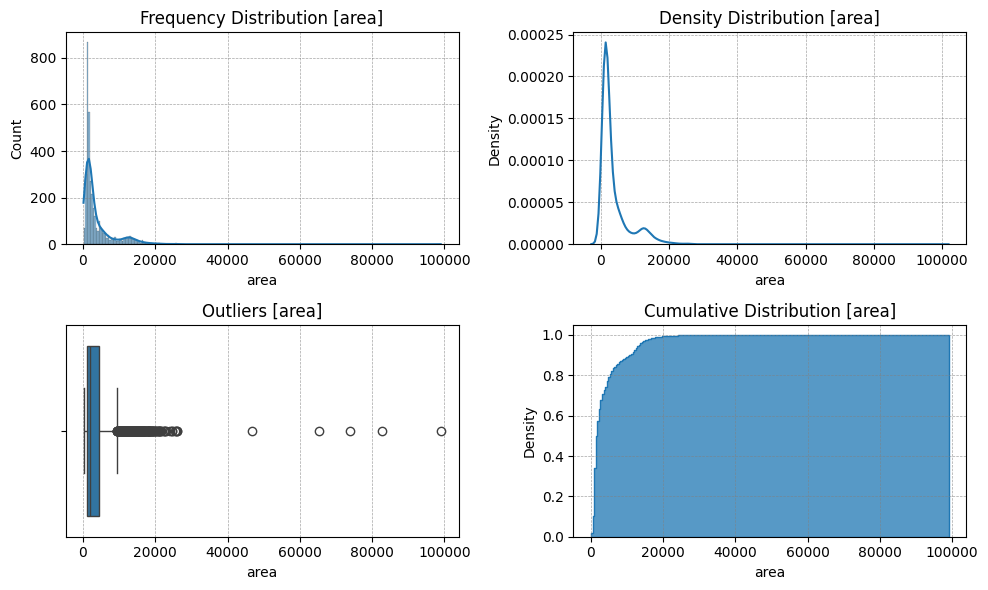

In [50]:
## After Removing records where error detected and after updating area calculation.
df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('area')

### [bedRoom] Deep Analysis

Considered Descrete - Low Cardinality: bedRoom(float64)


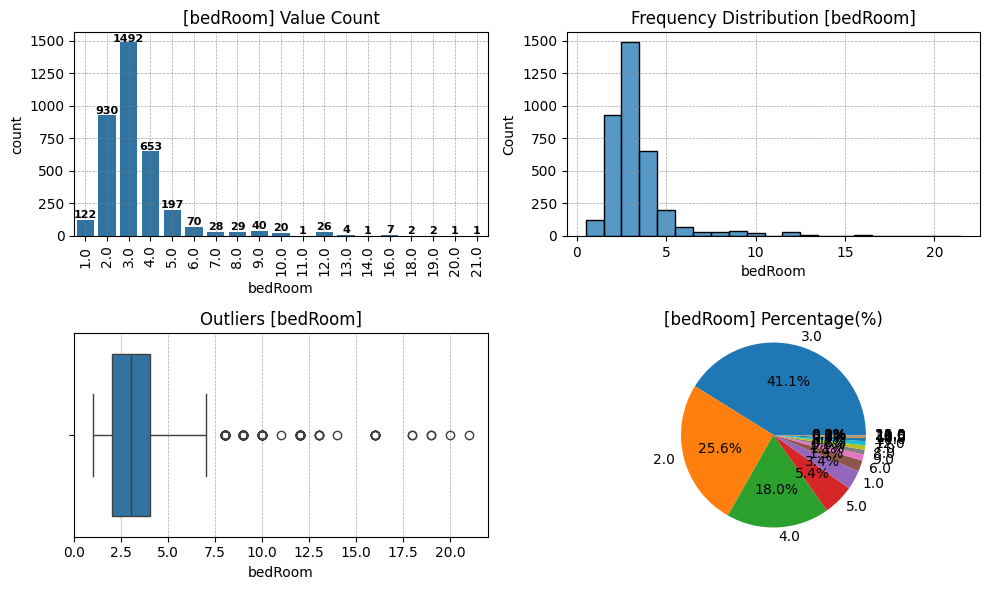

In [51]:
df_uni = UnivariateAnalysis(df)
bedRoom_observation, bedRoom_observation_outlier = df_uni.NumericalFeatureAnalysis('bedRoom')

In [52]:
bedRoom_observation

,field,bedRoom
0,non_null_count,3626
1,null_count,1
2,null%,0.0276
3,dtype,float64
4,min,1.0
5,max,21.0
6,mean,3.33
7,median,3.0
8,std,1.83
9,var (M),0.0


In [53]:
bedRoom_observation_outlier

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
19,house,independent,sector 43,2.10,4250.0,4941.0,Plot area 61(51 sq.m.),10.0,10.0,3+,5.0,West,New Property,NaN,549.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,20.0
21,house,independent,sector 4,1.10,6111.0,1800.0,Plot area 200(167.23 sq.m.),8.0,4.0,3+,2.0,West,Old Property,NaN,1800.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,7.0
27,house,sector 57 huda,sector 57,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8.0,8.0,3+,4.0,East,Relatively New,NaN,162.0,160.0,0.0,0.0,1.0,1.0,0.0,0.0,94.0
76,house,independent,sector 12,2.50,13888.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,8.0
93,house,dlf city plots phase 2,sector 25,10.00,44444.0,2250.0,Plot area 250(23.23 sq.m.),12.0,12.0,3+,4.0,North,Relatively New,NaN,250.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3699,house,dlf city plots phase 2,sector 25,10.75,29861.0,3600.0,Plot area 400(334.45 sq.m.),9.0,9.0,3+,3.0,South-West,Old Property,NaN,3600.0,NaN,0.0,1.0,1.0,1.0,0.0,1.0,73.0
3702,house,independent,sector 23,5.50,21825.0,2520.0,Plot area 280(234.12 sq.m.),8.0,8.0,2,3.0,East,Moderately Old,NaN,2520.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,76.0
3712,house,independent,sector 45,4.49,24455.0,1836.0,Plot area 204(170.57 sq.m.),9.0,9.0,3+,3.0,North-West,Moderately Old,NaN,1836.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,90.0
3791,house,independent,sector 55,5.00,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,0.0,44.0


In [54]:
## Fetching Record where bedroom > 10
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False).shape

(45, 23)

(3581, 23)
Considered Descrete - Low Cardinality: bedRoom(float64)


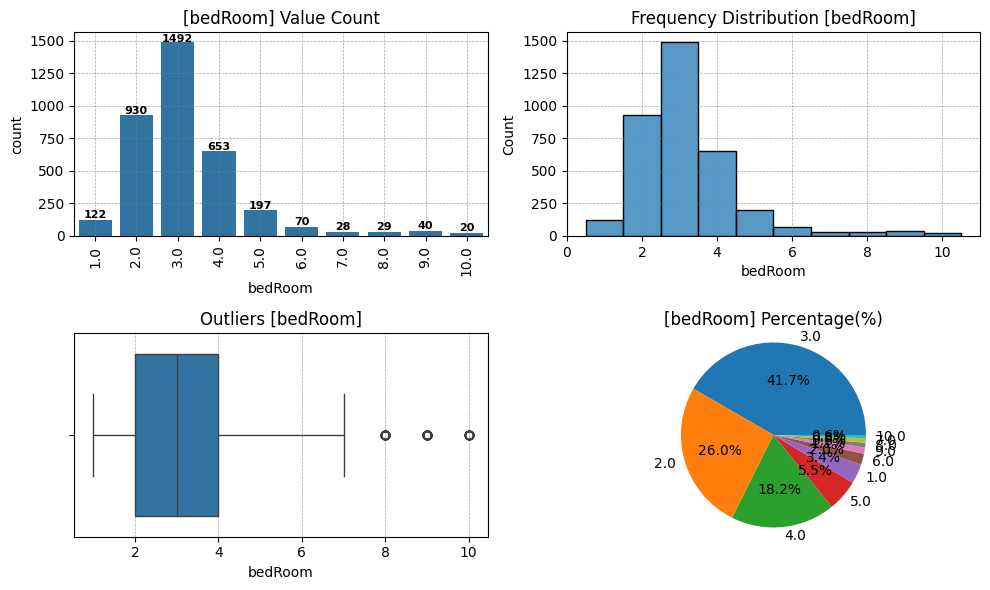

In [55]:
## Filtering Data Frame where bedRoom <= 10
df = df[df['bedRoom'] <= 10]
print(df.shape)

## After Applying Filter
df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('bedRoom')

### [bathroom] Deep Analysis

Considered Descrete - Low Cardinality: bathroom(float64)


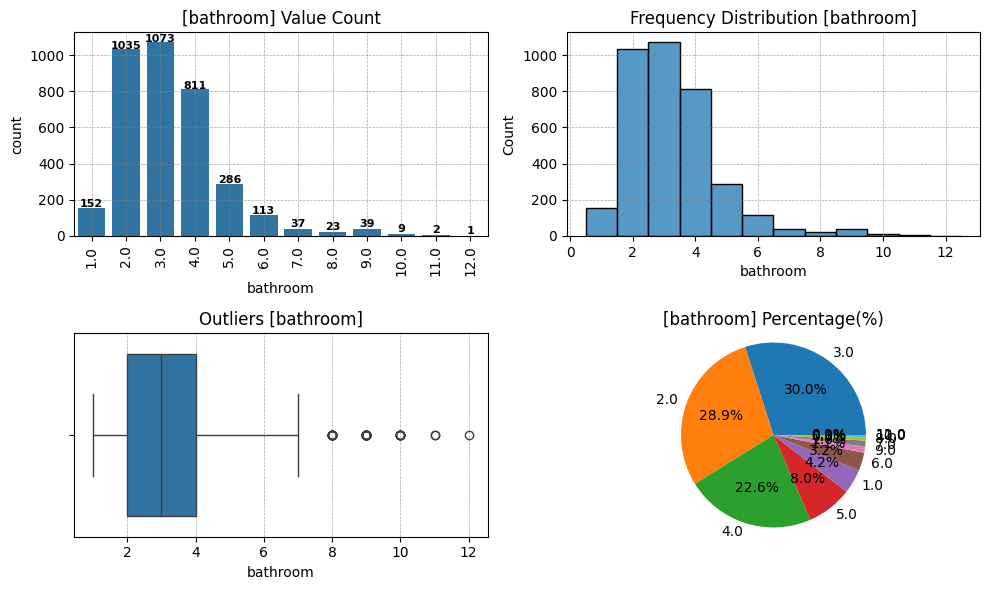

In [56]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
bathroom_obdervation , bathroom_outliers = df_uni.NumericalFeatureAnalysis('bathroom')

In [57]:
## Fetching Record Bathroom > 10
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2120,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,146.0
106,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,38.0
2723,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,39.0


## [super_built_up_area] deep analysis

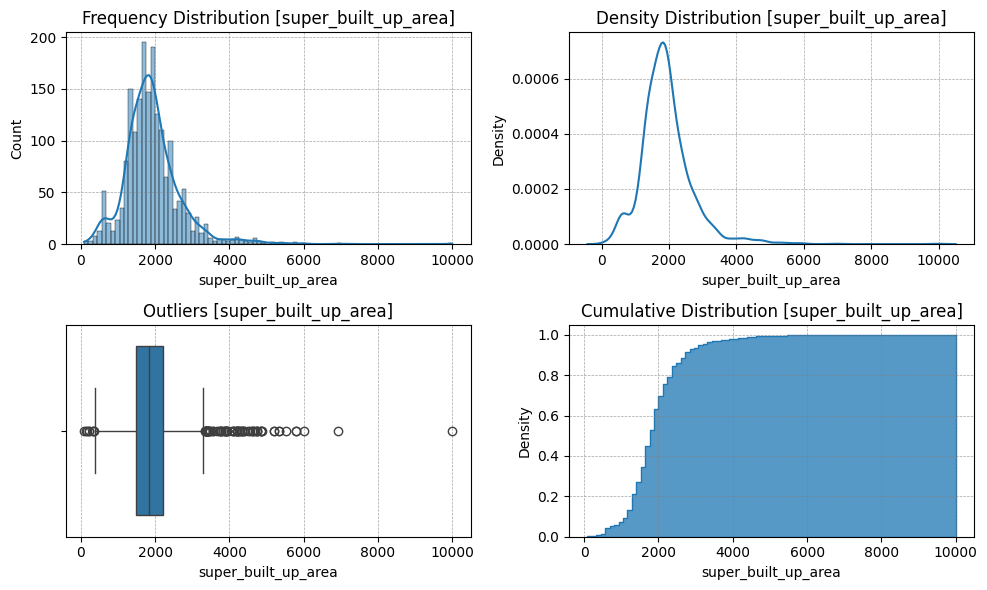

In [58]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
super_built_up_area_observation , super_built_up_area_outliers = df_uni.NumericalFeatureAnalysis('super_built_up_area')

In [59]:
## Fetching Records super_built_up_area > 6000
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
749,flat,bestech park view grand spa,sector 81,4.0,6786.0,5894.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,140.0
1390,flat,krrish provence estate,gwal pahari,7.0,7500.0,9333.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,49.0


## [built_up_area] Deep Analysis

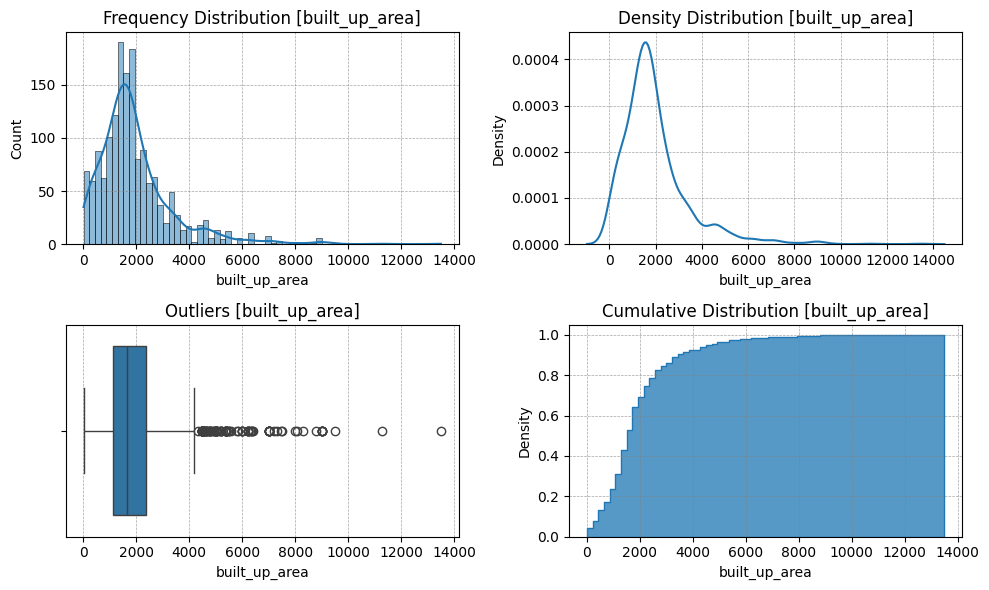

In [60]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
built_up_area_observation , built_up_area_outliers = df_uni.NumericalFeatureAnalysis('built_up_area')

In [61]:
## Fetching Records built_up_area > 10000

df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
960,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3.0,3.0,1,1.0,North,Relatively New,NaN,13500.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1329,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,42.0


## [carpet_area] Deep Analysis

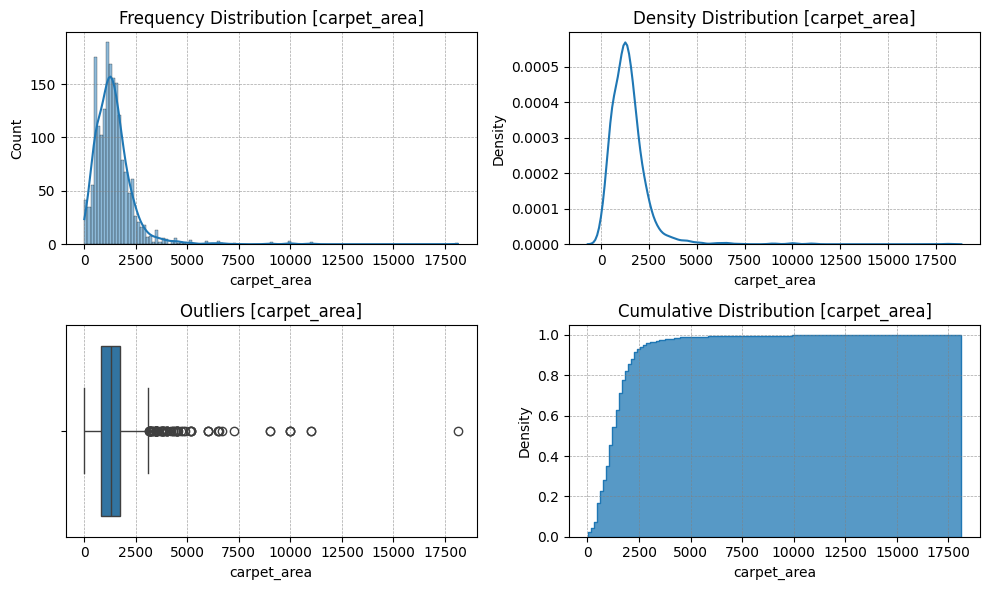

In [62]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
carpet_area_observation , carpet_area_outliers = df_uni.NumericalFeatureAnalysis('carpet_area')

In [63]:
## Fetchning Records carpet_area > 10000
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
122,house,independent,sector 26,18.4,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,0.0,60.0
2212,flat,godrej air,sector 85,2.0,1379.0,14503.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,0.0,44.0
3701,flat,m3m golfestate,sector 65,1.0,12000.0,833.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,1.0,60.0


In [64]:
df.loc[2131,'carpet_area'] = 1812
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
122,house,independent,sector 26,18.4,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,0.0,60.0
2212,flat,godrej air,sector 85,2.0,1379.0,14503.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,0.0,44.0
3701,flat,m3m golfestate,sector 65,1.0,12000.0,833.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,1.0,60.0


## [luxury_score] Deep Analysis

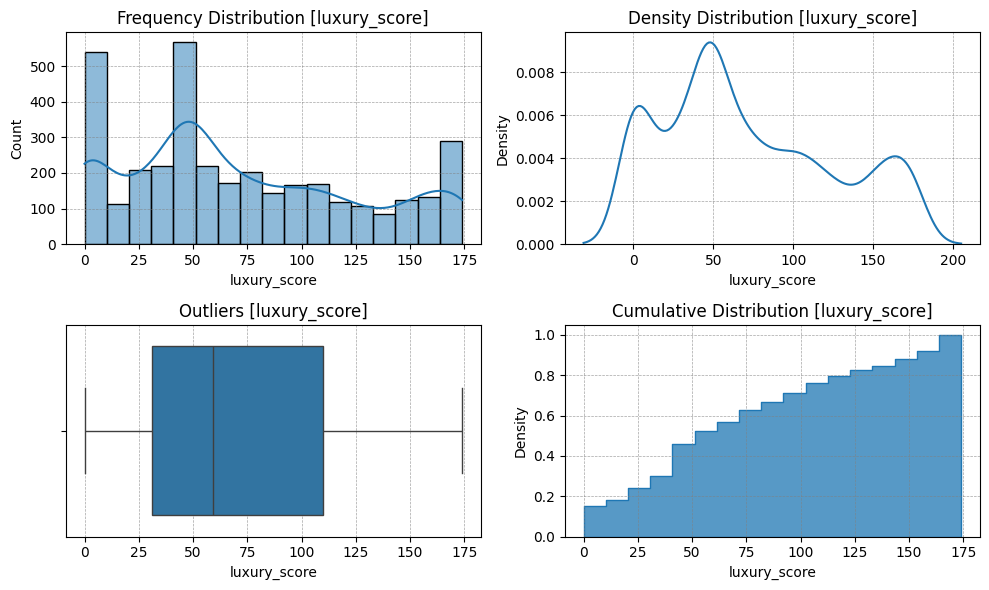

In [65]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
luxury_score_observation , luxury_score_outliers = df_uni.NumericalFeatureAnalysis('luxury_score')

In [66]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,apna enclave,sector 3,8.0,6153.0,13002.0,Super Built up area 1300(120.77 sq.m.)Built Up...,3.0,3.0,1,0.0,NaN,Old Property,1300.0,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,flat,la vida by tata housing,sector 113,2.0,11346.0,1763.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3.0,3.0,3,3.0,North,New Property,2690.0,2599.0,2450.0,1.0,1.0,0.0,0.0,0.0,1.0,174.0
3,flat,g l s arawali homes,sohna road,2.0,4513.0,4432.0,Super Built up area 576(53.51 sq.m.),2.0,2.0,2,1.0,NaN,Moderately Old,576.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,flat,tarc maceo,sector 91,9.0,5413.0,16627.0,Super Built up area 1404(130.44 sq.m.),2.0,2.0,3+,8.0,East,Moderately Old,1404.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,85.0
5,flat,bptp terra,sector 37d,1.0,7530.0,1328.0,Super Built up area 2191(203.55 sq.m.)Built Up...,4.0,3.0,3+,6.0,West,Relatively New,2191.0,2091.0,1991.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0


In [67]:
## Recalculating price_per_sqft to avoid any protential data error after Making few updates 

df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

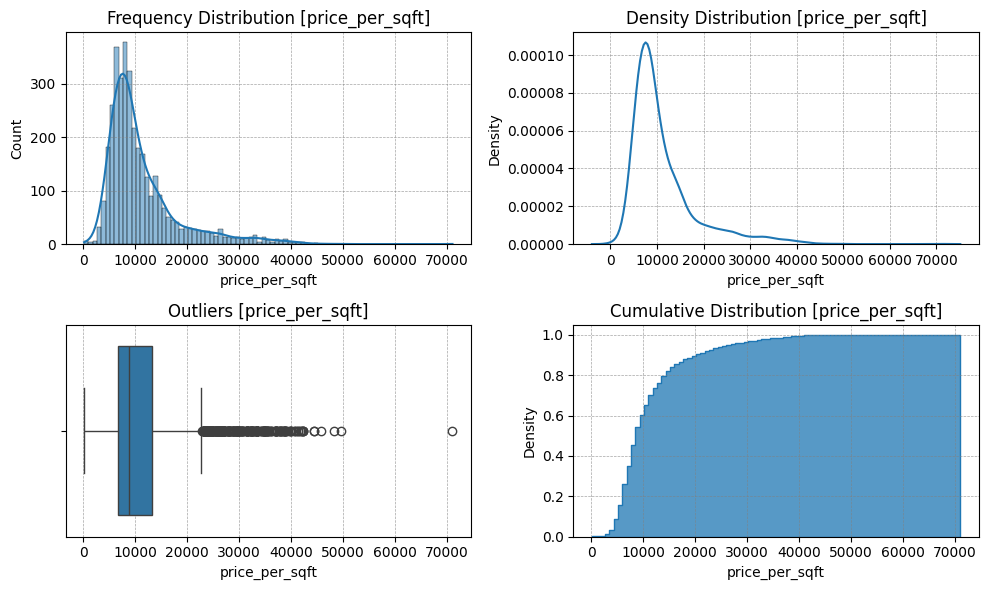

In [68]:
## Checking for any potential outliers

df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('price_per_sqft')

In [69]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
48,house,unitech espace,sector 50,7.35,71014.0,1035.0,Plot area 240(200.67 sq.m.),4.0,4.0,3+,3.0,South,Moderately Old,NaN,240.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,52.0
98,house,independent,sector 105,9.90,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
107,house,independent,sector 28,12.00,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,60.0
316,house,independent,sector 26,19.00,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,103.0
327,house,sushant lok 1 builder floors,sector 43,13.00,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,7.0
708,house,dlf city plots,sector 26,19.00,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,121.0
1099,house,independent,sector 25,13.00,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0
2020,house,independent,sector 43,9.50,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,0.0,88.0
2812,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,97.0
3791,house,independent,sector 55,5.00,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,0.0,44.0


In [70]:
## Caluculate Room Ratio 5 percentile
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(270.0)

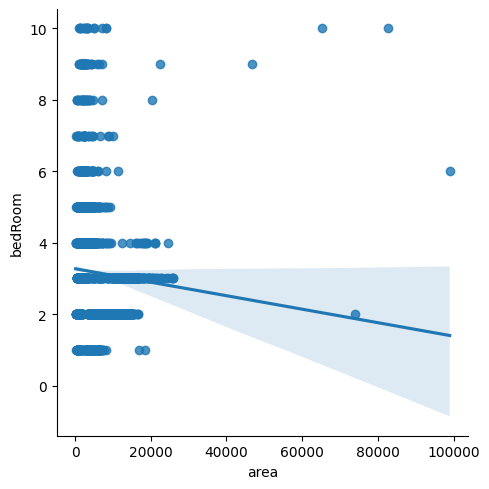

In [71]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [72]:
## Add Column for Area Room Ratio Calculation
df['area_room_ratio'] = df['area']/df['bedRoom']

In [73]:
df[df['area_room_ratio']<250]['bedRoom'].value_counts()

bedRoom
3.0     42
5.0     30
4.0     25
6.0     17
2.0     16
9.0     15
8.0     11
7.0      8
10.0     7
Name: count, dtype: int64

In [74]:
## Filter data frame for area_room_ratio > 100 (Basically Drop all records where area_room_ratio < 100)
df = df[df['area_room_ratio'] > 100]

In [75]:
## Investigation Any Annomoly 
## More than 3 bed rooms where ratio < 250 are observed

outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]
outliers_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
21,house,independent,sector 4,1.10,6111.0,1800.0,Plot area 200(167.23 sq.m.),8.0,4.0,3+,2.0,West,Old Property,NaN,1800.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,7.0,225.00
27,house,sector 57 huda,sector 57,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8.0,8.0,3+,4.0,East,Relatively New,NaN,162.0,160.0,0.0,0.0,1.0,1.0,0.0,0.0,94.0,182.25
29,house,prem kunj,sohna road road,0.50,7407.0,675.0,Plot area 675(62.71 sq.m.)Built Up area: 725 s...,5.0,4.0,3,3.0,South-West,Relatively New,NaN,725.0,675.0,0.0,0.0,0.0,1.0,0.0,1.0,22.0,135.00
76,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,8.0,200.00
119,house,independent,sector 4,0.92,15257.0,603.0,Plot area 67(56.02 sq.m.),4.0,4.0,3,4.0,East,Moderately Old,NaN,603.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,150.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,house,independent,sector 3,0.92,15257.0,603.0,Built Up area: 603 (56.02 sq.m.),4.0,1.0,0,1.0,NaN,Undefined,NaN,603.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,150.75
3701,flat,m3m golfestate,sector 65,1.00,12005.0,833.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,1.0,60.0,208.25
3712,house,independent,sector 45,4.49,24455.0,1836.0,Plot area 204(170.57 sq.m.),9.0,9.0,3+,3.0,North-West,Moderately Old,NaN,1836.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,90.0,204.00
3754,house,independent,sector 12,1.20,14184.0,846.0,Plot area 846(78.6 sq.m.)Built Up area: 846 sq...,4.0,4.0,2,2.0,North,Relatively New,NaN,846.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,7.0,211.50


In [76]:
## For Records that has more than 3 bedroom is dividev by the FloorNum
outliers_df['bedRoom'] = round(outliers_df['bedRoom'] / outliers_df['floorNum'])

In [77]:
df.update(outliers_df)

In [78]:
df.shape

(3560, 24)

In [79]:
## Recalulating area_room_ratio after df update
df['area_room_ratio'] = df['area']/df['bedRoom']

## Reinvestigating for bed room > 4
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
76,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,8.0,200.000000
1014,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1.0,0,1.0,NaN,New Property,NaN,2250.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,225.000000
1031,flat,tulip violet,sector 69,1.00,15361.0,651.0,Carpet area: 1250 (116.13 sq.m.),inf,4.0,2,0.0,South,Relatively New,NaN,NaN,1250.0,0.0,0.0,0.0,0.0,0.0,1.0,174.0,0.000000
1295,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,120.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,120.000000
1349,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5.0,2.0,2,1.0,NaN,Old Property,NaN,67.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,29.0,120.600000
2312,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,180.000000
2337,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,150.000000
2604,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,220.000000
2828,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,166.666667
3060,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,0.0,225.000000


In [80]:
## Dropping Records where bedroom > 4 
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

In [81]:
df.shape

(3547, 24)

In [82]:
df.to_csv(f"{file_path}/7.gurgaon_properties_outlier_treated.csv",index=False)

In [83]:
# import dtale
# d = dtale.show(df)
# d.open_browser()



In [84]:
df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,apna enclave,sector 3,8.0,6153.0,13002.0,Super Built up area 1300(120.77 sq.m.)Built Up...,3.0,3.0,1,0.0,NaN,Old Property,1300.0,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4334.000000
1,flat,la vida by tata housing,sector 113,2.0,11344.0,1763.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3.0,3.0,3,3.0,North,New Property,2690.0,2599.0,2450.0,1.0,1.0,0.0,0.0,0.0,1.0,174.0,587.666667
3,flat,g l s arawali homes,sohna road,2.0,4513.0,4432.0,Super Built up area 576(53.51 sq.m.),2.0,2.0,2,1.0,NaN,Moderately Old,576.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2216.000000
4,flat,tarc maceo,sector 91,9.0,5413.0,16627.0,Super Built up area 1404(130.44 sq.m.),2.0,2.0,3+,8.0,East,Moderately Old,1404.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,85.0,8313.500000
5,flat,bptp terra,sector 37d,1.0,7530.0,1328.0,Super Built up area 2191(203.55 sq.m.)Built Up...,4.0,3.0,3+,6.0,West,Relatively New,2191.0,2091.0,1991.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0,332.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,flat,smart world gems,sector 89,8.0,7796.0,10262.0,Super Built up area 1103(102.47 sq.m.),2.0,3.0,3,4.0,NaN,Under Construction,1103.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,45.0,5131.000000
3798,flat,orris aster court premier,sector 85,1.0,5896.0,1696.0,Super Built up area 2120(196.95 sq.m.)Built Up...,3.0,4.0,2,5.0,North,Relatively New,2120.0,1900.0,1800.0,0.0,1.0,0.0,0.0,0.0,0.0,174.0,565.333333
3799,flat,supertech araville,sector 79,7.0,6024.0,11620.0,Super Built up area 1295(120.31 sq.m.),2.0,2.0,3+,0.0,NaN,New Property,1295.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,74.0,5810.000000
3800,flat,spaze privvy the address,sector 93,1.0,6901.0,1449.0,Super Built up area 1805(167.69 sq.m.)Built Up...,3.0,4.0,2,12.0,North-East,Relatively New,1805.0,1350.0,1100.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,483.000000
